## muticlass classification


In [2]:
# 기본적인 CNN을 하기 위한 라이브러리 불러오기 
import tensorflow as tf 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [8]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")

    return img

In [32]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

In [3]:
# CNN을 위한 데이터 다운로드 
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

......... ..........  0%  788K 10m15s
   100K .......... .......... .......... .......... ..........  0%  686K 10m56s
   150K .......... .......... .......... .......... ..........  0%  952K 10m25s
   200K .......... .......... .......... .......... ..........  0% 1.81M 9m15s
   250K .......... .......... .......... .......... ..........  0%  838K 9m23s
   300K .......... .......... .......... .......... ..........  0%  996K 9m15s
   350K .......... .......... .......... .......... ..........  0% 1.28M 8m54s
   400K .......... .......... .......... .......... ..........  0% 1.13M 8m43s
   450K .......... .......... .......... .......... ..........  0% 1.32M 8m28s
   500K .......... .......... .......... .......... ..........  0%  743K 8m44s
   550K .......... .......... .......... .......... ..........  0% 1.11M 8m38s
   600K .......... .......... .......... .......... ..........  0% 1.52M 8m23s
   650K .......... .......... .......... .......... ..........  0% 1.57M 8m9s
   700K .....

In [4]:
# 다운로드한 파일 압축 햊 ㅔ
import zipfile

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r") # 읽기 모드로 풀어라
zip_ref.extractall()
zip_ref.close()

In [5]:
# 압축해제한 디렉토리의 구조 및 파일 확인

import os 

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"{dirpath}에 {len(dirnames)}개 디렉토리와 {len(filenames)}개의 이미지가 존재합니다.")

10_food_classes_all_data에 2개 디렉토리와 0개의 이미지가 존재합니다.
10_food_classes_all_data\test에 10개 디렉토리와 0개의 이미지가 존재합니다.
10_food_classes_all_data\test\chicken_curry에 0개 디렉토리와 250개의 이미지가 존재합니다.
10_food_classes_all_data\test\chicken_wings에 0개 디렉토리와 250개의 이미지가 존재합니다.
10_food_classes_all_data\test\fried_rice에 0개 디렉토리와 250개의 이미지가 존재합니다.
10_food_classes_all_data\test\grilled_salmon에 0개 디렉토리와 250개의 이미지가 존재합니다.
10_food_classes_all_data\test\hamburger에 0개 디렉토리와 250개의 이미지가 존재합니다.
10_food_classes_all_data\test\ice_cream에 0개 디렉토리와 250개의 이미지가 존재합니다.
10_food_classes_all_data\test\pizza에 0개 디렉토리와 250개의 이미지가 존재합니다.
10_food_classes_all_data\test\ramen에 0개 디렉토리와 250개의 이미지가 존재합니다.
10_food_classes_all_data\test\steak에 0개 디렉토리와 250개의 이미지가 존재합니다.
10_food_classes_all_data\test\sushi에 0개 디렉토리와 250개의 이미지가 존재합니다.
10_food_classes_all_data\train에 10개 디렉토리와 0개의 이미지가 존재합니다.
10_food_classes_all_data\train\chicken_curry에 0개 디렉토리와 750개의 이미지가 존재합니다.
10_food_classes_all_data\train\chicken_wings에 0개 디렉토리와 750개의 이미지가 존재합니다.
10_food_cl

In [6]:
# 학습 및 테스트 데이터 기본 디렉터리 설정 

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test"

In [7]:
# 라벨을 생성 

import pathlib

data_dir = pathlib.Path(train_dir)
class_name = np.array(sorted([
    item.name for item in data_dir.glob("*")
])
)

class_name

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Image shape: (512, 512, 3)


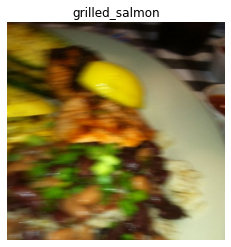

In [21]:
# 데이터의 시각화! 

import random
img = view_random_image(
    target_dir = train_dir,
    target_class = random.choice(class_name)
)

In [25]:
# 데이터 준비 - 이미지 생성기! 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale =  1/255.) # 모든 값을 0 ~ 1 사이로 변경 
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 30,
    class_mode = "categorical"
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = 30,
    class_mode = "categorical"
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# 왜 굳이 224 x 224 인가?
# 우리가 원하는 모든 이미지 크기를 사용해도 좋다! 
# 하지만 224 x 224 가 이미지 전처리에 매우 일반적인 크기이다.

In [26]:
# 데이터 준비되었으니 이제 모델을 정의 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense 

model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    Conv2D(10, 3, activation="relu",),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")  ## 클래스가 총 10개고 소프트맥스로 바꿔줌 
])

In [28]:
# 모델 컴파일 

model_9.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

In [29]:
history_9 = model_9.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data =  test_data,
    validation_steps= len(test_data)
)

Epoch 1/5
250/250 [==============================] - 459s 2s/step - loss: 2.1652 - accuracy: 0.1971 - val_loss: 2.0351 - val_accuracy: 0.2620
Epoch 2/5
250/250 [==============================] - 420s 2s/step - loss: 1.8427 - accuracy: 0.3637 - val_loss: 1.8905 - val_accuracy: 0.3340
Epoch 3/5
250/250 [==============================] - 408s 2s/step - loss: 1.2614 - accuracy: 0.5824 - val_loss: 2.1916 - val_accuracy: 0.3272
Epoch 4/5
250/250 [==============================] - 414s 2s/step - loss: 0.5281 - accuracy: 0.8341 - val_loss: 3.1641 - val_accuracy: 0.2780
Epoch 5/5
250/250 [==============================] - 408s 2s/step - loss: 0.1419 - accuracy: 0.9596 - val_loss: 4.2989 - val_accuracy: 0.2788


In [30]:
model_9.evaluate(test_data)

84/84 [==============================] - 53s 636ms/step - loss: 4.2989 - accuracy: 0.2788


[4.298903942108154, 0.27880001068115234]

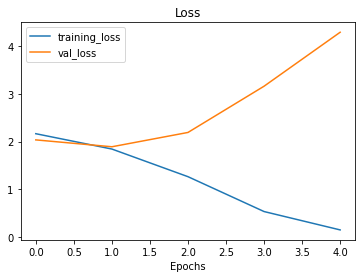

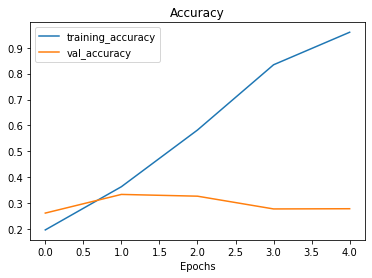

In [33]:
plot_loss_curves(history_9)

In [34]:
model_10 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")  
])

model_10.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_10 = model_10.fit(
    train_data,
    epochs = 5,
    steps_per_epoch = len(train_data),
    validation_data =  test_data,
    validation_steps= len(test_data)
)

Epoch 1/5
250/250 [==============================] - 185s 737ms/step - loss: 2.1115 - accuracy: 0.2365 - val_loss: 2.0041 - val_accuracy: 0.2864
Epoch 2/5
250/250 [==============================] - 188s 751ms/step - loss: 1.6292 - accuracy: 0.4579 - val_loss: 2.0589 - val_accuracy: 0.3020
Epoch 3/5
250/250 [==============================] - 183s 731ms/step - loss: 1.0563 - accuracy: 0.6659 - val_loss: 2.2408 - val_accuracy: 0.2960
Epoch 4/5
250/250 [==============================] - 182s 729ms/step - loss: 0.5581 - accuracy: 0.8381 - val_loss: 2.7632 - val_accuracy: 0.2896
Epoch 5/5
250/250 [==============================] - 184s 734ms/step - loss: 0.2403 - accuracy: 0.9404 - val_loss: 3.3194 - val_accuracy: 0.2828


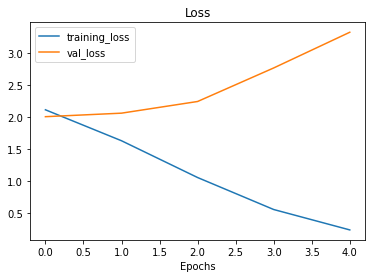

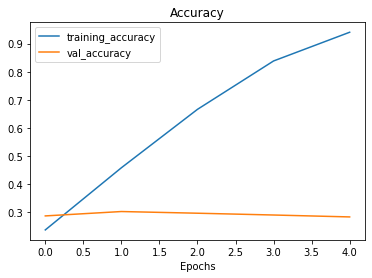

In [35]:
plot_loss_curves(history_10)

### 모델을 개선 시키는 방법 

1. 더 많은 데이터 - 데이터가 많을 수록 더 많은 패턴을 찾을 수 있다. 
2. 모델 단순화 - 너무 과도하게 학습을 시키지 않는다라는 개념, 패턴이 아닌 것도 패턴으로 인식하는 과정을 제거 
3. Data Augmentation 
    - 데이터에 다양성을 인위적으로 추가하여 모델 학습이 어렵게 해서 패턴을 더 잘 찾도록 하는 방법 
4. 전이 학습 

오버피팅 (과적합)을 방지하는 방법들을 우리는 regularization (정규화) 라고 합니다.

In [37]:
# 3. Data Augmentation 적용

train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
) 

train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 30,
    class_mode = "categorical"
)

Found 7500 images belonging to 10 classes.


In [39]:
model_11 = tf.keras.models.clone_model(model_10)

model_11.compile(
    loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"]
)

history_11 = model_11.fit(
    train_data_augmented,
    epochs = 5,
    steps_per_epoch = len(train_data_augmented),
    validation_data =  test_data,
    validation_steps= len(test_data)
)

Epoch 1/5
250/250 [==============================] - 273s 1s/step - loss: 2.1958 - accuracy: 0.2099 - val_loss: 1.9862 - val_accuracy: 0.2892
Epoch 2/5
250/250 [==============================] - 289s 1s/step - loss: 2.0666 - accuracy: 0.2624 - val_loss: 1.9128 - val_accuracy: 0.3384
Epoch 3/5
250/250 [==============================] - 280s 1s/step - loss: 2.0249 - accuracy: 0.2880 - val_loss: 1.8768 - val_accuracy: 0.3488
Epoch 4/5
250/250 [==============================] - 304s 1s/step - loss: 1.9912 - accuracy: 0.3028 - val_loss: 1.8319 - val_accuracy: 0.3752
Epoch 5/5
250/250 [==============================] - 286s 1s/step - loss: 1.9363 - accuracy: 0.3256 - val_loss: 1.8170 - val_accuracy: 0.3764


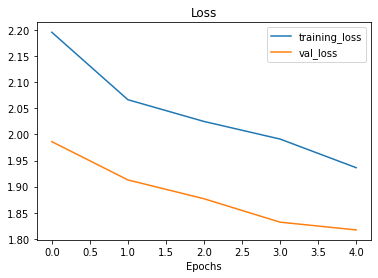

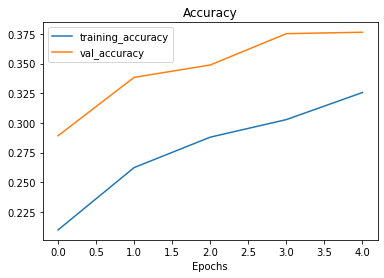

In [40]:
plot_loss_curves(history_11)

In [41]:
import pathlib 
import numpy as numpy 

data_dir = pathlib.Path("10_food_classes_all_data/train/")

class_names = np.array(
    sorted(
        [item.name for item in data_dir.glob("*")]
    )
)

print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [42]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [43]:
def load_and_prep_image(filename, img_shape = 224):
    img = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [img_shape, img_shape])
    img = img / 255.
    return img

In [44]:
food = load_and_prep_image("03-sushi.jpeg")

In [45]:
print(food.shape)

(224, 224, 3)


In [46]:
model_11.predict(tf.expand_dims(food, axis=0))

array([[0.08832828, 0.18543729, 0.03323888, 0.14607152, 0.09147244,
        0.03027654, 0.08127803, 0.06316639, 0.08290093, 0.1978297 ]],
      dtype=float32)

In [47]:
def pred_and_plot(model, filename, class_name):
    img = load_and_prep_image(filename)

    pred = model.predict(tf.expand_dims(img, axis = 0))

    if len(pred[0]) > 1 :
        pred_class = class_names[pred.argmax()]
    else :
        pred_class = class_names[int(tf.round(pred)[0][0])]

    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

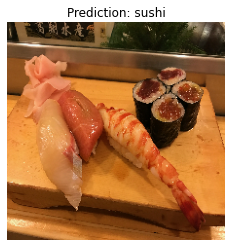

In [48]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

In [49]:
model_11.save("saved_tarined_model")

INFO:tensorflow:Assets written to: saved_tarined_model\assets


In [51]:
loaded_model_11 = tf.keras.models.load_model("saved_tarined_model")
loaded_model_11.evaluate(test_data)

84/84 [==============================] - 27s 323ms/step - loss: 1.8170 - accuracy: 0.3764


[1.8170437812805176, 0.3763999938964844]